In [1]:
## Open file
data <- read.csv("gsva.csv", header = FALSE)
# print(data)

In [2]:
## convert it to matrix
data0 = as.matrix(data)
print(dim(data0))

nrow0 <- dim(data0)[1]   
ncol0 <- dim(data0)[2]

print(nrow0)
print(ncol0)

[1]  24 175
[1] 24
[1] 175


In [3]:
set.seed(1)  ## to get the same result
library(GSVA) ## load library

p <- nrow0    ## number of genes
n <- ncol0     ## no of samples (expression dataset).

nGS <- 1    ## number of gene sets
min.sz <- 7  ## minimum gene set size
max.sz <- 15 ## maximum gene set size

## Do not pass direct matrix to X, it will throw error
## Which took so time to figure it out
X <- matrix(data0, nrow=p, dimnames=list(1:p, 1:n))

print(dim(X))

gs <- as.list(sample(min.sz:max.sz, size=nGS, replace=TRUE)) ## sample gene set sizes 
# print(gs)
gs <- lapply(gs, function(n, p) sample(1:p, size=n, replace=FALSE), p) ## sample gene sets
# print(gs)
es.max <- gsva(X, gs, mx.diff=FALSE, verbose=FALSE, parallel.sz=1)
es.dif <- gsva(X, gs, mx.diff=TRUE, verbose=FALSE, parallel.sz=1)

# print(es.max)
# print(es.dif)
             

[1]  24 175


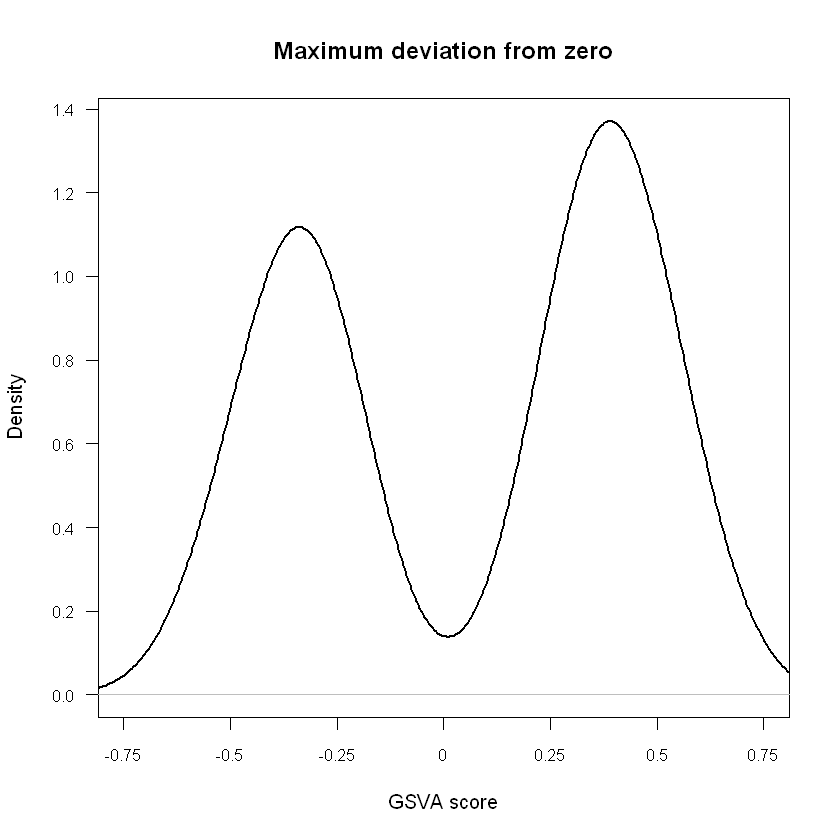

In [4]:
plot(density(as.vector(es.max)), main="Maximum deviation from zero", xlab="GSVA score", 
     lwd=2, las=1, xaxt="n", xlim=c(-0.75, 0.75), cex.axis=0.8)
axis(1, at=seq(-0.75, 0.75, by=0.25), labels=seq(-0.75, 0.75, by=0.25), cex.axis=0.8)

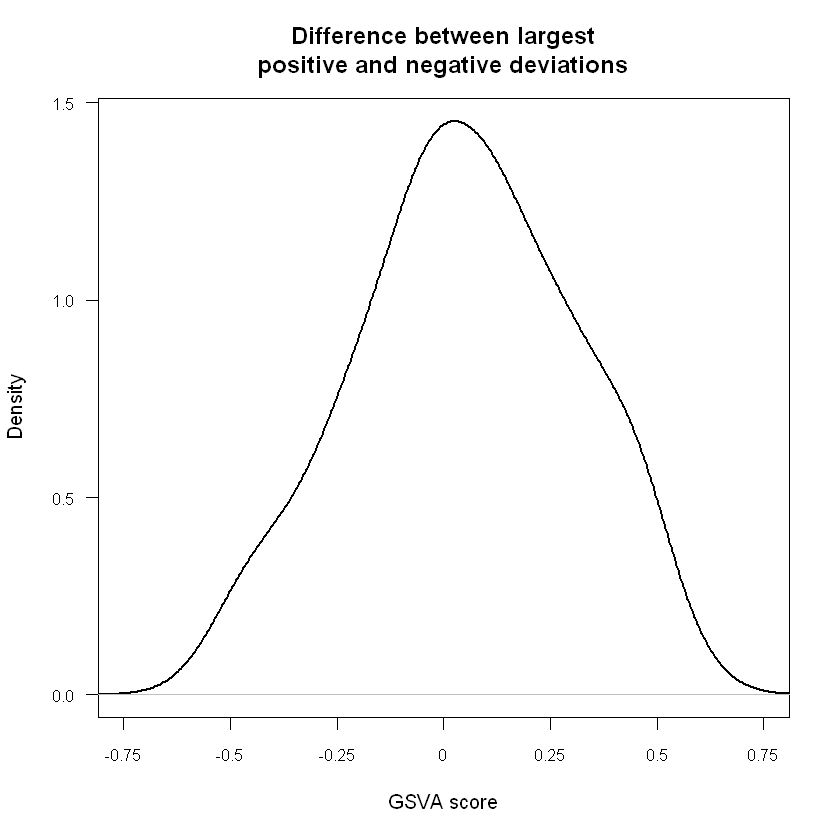

In [5]:
plot(density(as.vector(es.dif)), main="Difference between largest\npositive and negative deviations",
     xlab="GSVA score", lwd=2, las=1, xaxt="n", xlim=c(-0.75, 0.75), cex.axis=0.8)
axis(1, at=seq(-0.75, 0.75, by=0.25), labels=seq(-0.75, 0.75, by=0.25), cex.axis=0.8)